In [200]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [201]:
df = pd.read_csv('Laptop_price.csv')
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [202]:
df.shape

(1000, 7)

checking if the dataset needed to e cleaned before preprocessing

In [203]:
df.groupby(df['Brand']).count()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
Brand,,,,,,
Acer,204,204,204,204,204,204
Asus,206,206,206,206,206,206
Dell,210,210,210,210,210,210
HP,190,190,190,190,190,190
Lenovo,190,190,190,190,190,190


In [204]:
category_array = df['Brand']
unique_categories = np.unique(category_array)
category_mapping = dict(zip(unique_categories, range(len(unique_categories))))
category_array = np.searchsorted(unique_categories, category_array)

df['Brand'] = category_array
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,1,3.830296,16,512,11.185147,2.641094,17395.093065
1,0,2.912833,4,1000,11.311372,3.260012,31607.605919
2,4,3.241627,4,256,11.853023,2.029061,9291.023542
3,0,3.806248,16,512,12.280360,4.573865,17436.728334
4,0,3.268097,32,1000,14.990877,4.193472,32917.990718


In [205]:
category_mapping

{'Acer': 0, 'Asus': 1, 'Dell': 2, 'HP': 3, 'Lenovo': 4}

In [206]:
df.isna().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [207]:
df.duplicated().sum()

0

In [208]:
dataset = df.values
data = dataset[:,0:6]
target = dataset[:,6]
target = np.reshape(target,(-1,1))

Scaling

In [209]:
from sklearn.preprocessing import MinMaxScaler

scaler_data = MinMaxScaler()
scaler_target = MinMaxScaler()

data_scaled = scaler_data.fit_transform(data)
target_scaled = scaler_target.fit_transform(target)

building model

In [210]:
model = Sequential()

model.add(Dense(60, input_dim=6, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(120, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 60)                420       
                                                                 
 dense_41 (Dense)            (None, 120)               7320      
                                                                 
 dropout_21 (Dropout)        (None, 120)               0         
                                                                 
 dense_42 (Dense)            (None, 120)               14520     
                                                                 
 dropout_22 (Dropout)        (None, 120)               0         
                                                                 
 dense_43 (Dense)            (None, 60)                7260      
                                                                 
 dropout_23 (Dropout)        (None, 60)               

trainning

In [211]:
from keras.callbacks import ModelCheckpoint
checkpoint_path = "models/model-{epoch:03d}.model"

checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss',save_best_only=True,mode='auto')

In [212]:
from sklearn.model_selection import train_test_split
train_data, test_data,  train_target, test_target = train_test_split(data_scaled,target_scaled,test_size=0.1) 

In [213]:
history = model.fit(train_data, train_target, epochs=65, validation_data=(test_data, test_target), callbacks=[checkpoint])

Epoch 1/65
29/29 [==============================] - ETA: 0s - loss: 0.0512 - mse: 0.0512

INFO:tensorflow:Assets written to: models\model-001.model\assets


INFO:tensorflow:Assets written to: models\model-001.model\assets


29/29 [==============================] - 15s 288ms/step - loss: 0.0512 - mse: 0.0512 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 2/65
28/29 [===========================>..] - ETA: 0s - loss: 0.0107 - mse: 0.0107

INFO:tensorflow:Assets written to: models\model-002.model\assets


INFO:tensorflow:Assets written to: models\model-002.model\assets


29/29 [==============================] - 6s 229ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 3/65
29/29 [==============================] - 1s 21ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 4/65
29/29 [==============================] - 1s 17ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 5/65
26/29 [=========================>....] - ETA: 0s - loss: 0.0077 - mse: 0.0077

INFO:tensorflow:Assets written to: models\model-005.model\assets


INFO:tensorflow:Assets written to: models\model-005.model\assets


29/29 [==============================] - 10s 371ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 6/65
29/29 [==============================] - 1s 18ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 7/65
28/29 [===========================>..] - ETA: 0s - loss: 0.0059 - mse: 0.0059

INFO:tensorflow:Assets written to: models\model-007.model\assets


INFO:tensorflow:Assets written to: models\model-007.model\assets


29/29 [==============================] - 6s 219ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 5.6647e-04 - val_mse: 5.6647e-04
Epoch 8/65
29/29 [==============================] - 1s 18ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 5.8214e-04 - val_mse: 5.8214e-04
Epoch 9/65
27/29 [==========================>...] - ETA: 0s - loss: 0.0047 - mse: 0.0047

INFO:tensorflow:Assets written to: models\model-009.model\assets


INFO:tensorflow:Assets written to: models\model-009.model\assets


29/29 [==============================] - 7s 251ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 3.9917e-04 - val_mse: 3.9917e-04
Epoch 10/65
29/29 [==============================] - ETA: 0s - loss: 0.0049 - mse: 0.0049

INFO:tensorflow:Assets written to: models\model-010.model\assets


INFO:tensorflow:Assets written to: models\model-010.model\assets


29/29 [==============================] - 7s 247ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 3.6270e-04 - val_mse: 3.6270e-04
Epoch 11/65
29/29 [==============================] - 1s 38ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 4.5585e-04 - val_mse: 4.5585e-04
Epoch 12/65
29/29 [==============================] - 1s 33ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 13/65
29/29 [==============================] - 1s 20ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 14/65
29/29 [==============================] - 1s 21ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 7.9411e-04 - val_mse: 7.9411e-04
Epoch 15/65
29/29 [==============================] - 1s 18ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 7.3561e-04 - val_mse: 7.3561e-04
Epoch 16/65
29/29 [==============================] - 1s 17ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 3.8402e-04 - val_mse: 3.8402e-04
Epoch 17/65
29/29 [============================

INFO:tensorflow:Assets written to: models\model-029.model\assets


INFO:tensorflow:Assets written to: models\model-029.model\assets


29/29 [==============================] - 7s 238ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 3.5507e-04 - val_mse: 3.5507e-04
Epoch 30/65
29/29 [==============================] - 1s 24ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 31/65
28/29 [===========================>..] - ETA: 0s - loss: 0.0019 - mse: 0.0019

INFO:tensorflow:Assets written to: models\model-031.model\assets


INFO:tensorflow:Assets written to: models\model-031.model\assets


29/29 [==============================] - 8s 286ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 2.9032e-04 - val_mse: 2.9032e-04
Epoch 32/65
29/29 [==============================] - 1s 23ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 3.9872e-04 - val_mse: 3.9872e-04
Epoch 33/65
29/29 [==============================] - 0s 17ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 34/65
29/29 [==============================] - 0s 16ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 35/65
29/29 [==============================] - 1s 17ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 4.9648e-04 - val_mse: 4.9648e-04
Epoch 36/65
29/29 [==============================] - 1s 17ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 37/65
29/29 [==============================] - 1s 18ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 6.4823e-04 - val_mse: 6.4823e-04
Epoch 38/65
29/29 [==============================] - 1s

INFO:tensorflow:Assets written to: models\model-041.model\assets


INFO:tensorflow:Assets written to: models\model-041.model\assets


29/29 [==============================] - 7s 232ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 2.7912e-04 - val_mse: 2.7912e-04
Epoch 42/65
29/29 [==============================] - 1s 19ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 4.2437e-04 - val_mse: 4.2437e-04
Epoch 43/65
29/29 [==============================] - 1s 21ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 8.1225e-04 - val_mse: 8.1225e-04
Epoch 44/65
29/29 [==============================] - 0s 17ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 4.3953e-04 - val_mse: 4.3953e-04
Epoch 45/65
29/29 [==============================] - 1s 17ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 46/65
29/29 [==============================] - 1s 17ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 47/65
29/29 [==============================] - 1s 17ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 9.5097e-04 - val_mse: 9.5097e-04
Epoch 48/65
29/29 [============================

INFO:tensorflow:Assets written to: models\model-049.model\assets


INFO:tensorflow:Assets written to: models\model-049.model\assets


29/29 [==============================] - 7s 239ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 2.3663e-04 - val_mse: 2.3663e-04
Epoch 50/65
29/29 [==============================] - 1s 24ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 51/65
29/29 [==============================] - 1s 25ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 5.3174e-04 - val_mse: 5.3174e-04
Epoch 52/65
29/29 [==============================] - 1s 38ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 5.8122e-04 - val_mse: 5.8122e-04
Epoch 53/65
29/29 [==============================] - 1s 19ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 54/65
29/29 [==============================] - 1s 18ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 4.9908e-04 - val_mse: 4.9908e-04
Epoch 55/65
29/29 [==============================] - 0s 17ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 3.4045e-04 - val_mse: 3.4045e-04
Epoch 56/65
29/29 [============================

INFO:tensorflow:Assets written to: models\model-065.model\assets


INFO:tensorflow:Assets written to: models\model-065.model\assets


29/29 [==============================] - 7s 240ms/step - loss: 9.1061e-04 - mse: 9.1061e-04 - val_loss: 1.7824e-04 - val_mse: 1.7824e-04


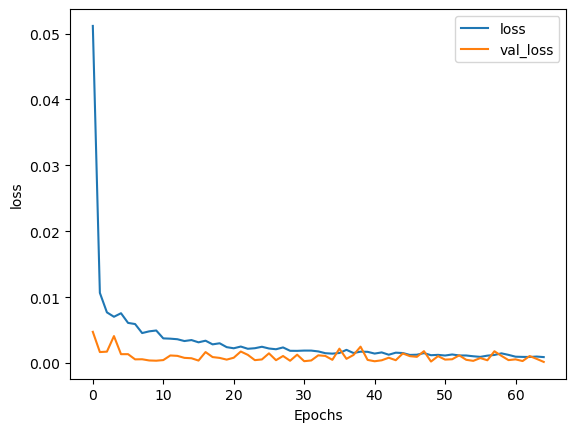

In [214]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

R2 Score

In [223]:
from sklearn.metrics import r2_score

predicted_results = model.predict(test_data)

r2 = r2_score(test_target, predicted_results)
print('R2 Score: ',r2)

4/4 [==============================] - 0s 42ms/step
R2 Score:  0.9988546748003959


inverse transformed predicted values vs actual values

In [225]:
print('Actual inverse_transform: ',scaler_target.inverse_transform(test_target[:10]).T[0])
print('Predicted_inverse_transform: ',scaler_target.inverse_transform(predicted_results[0:10]).T[0])

Actual inverse_transform:  [ 9750.0993915   8931.64158994 32379.0394215   9848.90700176
 18133.59750991 17515.91518148 10321.72941307 33239.41225958
 17033.49502985 16824.80327737]
Predicted_inverse_transform:  [ 9330.52   9389.367 31236.625  9886.814 18546.387 17396.105 10564.063
 32673.799 16897.324 16850.627]


getting prediction

In [228]:
my_test_data = [3,3.830297,32,1000,12.28036,2.641903]
my_test_data = scaler_data.transform([my_test_data])

result = model.predict(my_test_data)

predicted_value = scaler_target.inverse_transform(result)

print('Predicted price will be: ',predicted_value[0][0])

1/1 [==============================] - 0s 86ms/step
Predicted price will be:  32718.357


saving scaler models

In [216]:
import joblib
joblib.dump(scaler_data, 'models/scaler_data.sav')
joblib.dump(scaler_target, 'models/scaler_target.sav')

['scaler_target.sav']